**a)** Construya una funci´on que cargue todos los datos de entrenamiento y pruebas del problema generando
como salida: (i) dos matrices Xtr, Ytr, correspondientes a las im´agenes y etiquetas de entrenamiento,
(ii) dos matrices Xt, Yt, correspondientes a las im´agenes y etiquetas de pruebas, y finalmente (iii) dos
matrices Xv, Yv, correspondientes a im´agenes y etiquetas que se usar´an como conjunto de validaci´on, es
decir para tomar decisiones de dise˜no acerca del modelo. Este ´ultimo conjunto debe ser extra´ıdo desde
el conjunto de entrenamiento original y no debe superar las 7000 im´agenes.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('data/sign_mnist_train.csv')
    test = pd.read_csv('data/sign_mnist_test.csv')
    (train_set, validation_set) = train_test_split(train, test_size=7000, random_state=8500)
    
    y_tr = train_set['label']
    x_tr = train_set.iloc[:, 1:]
    
    y_t = test['label']
    x_t = test.iloc[:, 1:]
    
    y_v = validation_set['label']
    x_v = validation_set.iloc[:, 1:]

    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_tr, y_v , y_t = load_data()

**b)** Construya una funci´on que escale apropiadamente las im´agenes antes de trabajar. Experimente s´olo
escalando los datos de acuerdo a la intensidad m´axima de pixel (i.e., dividiendo por 255) y luego
centrando y escal´andolos como en actividades anteriores

In [3]:
def scale_by_max_pixel(x_set):
    return x_set/255


# Finish this one!
def center_and_scale(x_set):
    return x_set
x_tr = scale_by_max_pixel(x_tr)
x_t = scale_by_max_pixel(x_t)
x_v = scale_by_max_pixel(x_v)

**c)** Dise˜ne, entrene y eval´ue una red neuronal para el problema partir de la representaci´on original de las
im´agenes. Experimente con distintas arquitecturas, pre-procesamientos y m´etodos de entrenamiento, midiendo el error de clasificaci´on sobre el conjunto de validaci´on. En base a esta ´ultima medida de
desempe˜no, decida qu´e modelo, de entre todos los evaluados, medir´a finalmente en el conjunto de test.
Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o
igual a 0.2.

### Network 1

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Creación de red secuencial
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
validation_data=(x_v.values,to_categorical(y_v)))

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/keras/m

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 1s 53us/step - loss: 3.0655 - acc: 0.0857 - val_loss: 2.8185 - val_acc: 0.1417
Epoch 2/100
20455/20455 [==============================] - 1s 41us/step - loss: 2.6613 - acc: 0.1768 - val_loss: 2.5034 - val_acc: 0.2154
Epoch 3/100
20455/20455 [==============================] - 1s 42us/step - loss: 2.4059 - acc: 0.2275 - val_loss: 2.3405 - val_acc: 0.2299
Epoch 4/100
20455/20455 [==============================] - 1s 42us/step - loss: 2.2743 - acc: 0.2417 - val_loss: 2.3140 - val_acc: 0.2296
Epoch 5/100
20455/20455 [==============================] - 1s 39us/step - loss: 2.2025 - acc: 0.2582 - val_loss: 2.1759 - val_acc: 0.2569
Epoch 6/100
20455/20455 [==============================] - 1s 38us/step - loss: 2.1331 - acc: 0.2781 - val_loss: 2.1243 - val_acc: 0.2780
Epoch 7/100
20455/20455 [==============================] - 1s 40us/step - loss: 2.0518 - acc: 0.3083 - val_loss: 2.0101 - v

20455/20455 [==============================] - 1s 42us/step - loss: 0.4369 - acc: 0.8538 - val_loss: 0.4439 - val_acc: 0.8351
Epoch 60/100
20455/20455 [==============================] - 1s 36us/step - loss: 0.4265 - acc: 0.8520 - val_loss: 0.3531 - val_acc: 0.8853
Epoch 61/100
20455/20455 [==============================] - 1s 37us/step - loss: 0.4076 - acc: 0.8604 - val_loss: 0.4604 - val_acc: 0.8387
Epoch 62/100
20455/20455 [==============================] - 1s 40us/step - loss: 0.4040 - acc: 0.8628 - val_loss: 0.4857 - val_acc: 0.8214
Epoch 63/100
20455/20455 [==============================] - 1s 39us/step - loss: 0.3809 - acc: 0.8698 - val_loss: 0.3882 - val_acc: 0.8650
Epoch 64/100
20455/20455 [==============================] - 1s 40us/step - loss: 0.3716 - acc: 0.8757 - val_loss: 0.5971 - val_acc: 0.7847
Epoch 65/100
20455/20455 [==============================] - 1s 40us/step - loss: 0.3667 - acc: 0.8710 - val_loss: 0.3636 - val_acc: 0.8631
Epoch 66/100
20455/20455 [==============

Error de clasificación: 0.05

### Network 2

**d)** Para la mejor red entrenada anteriormente construya la matriz de confusi´on de las distintas clases, para
asi visualizar cu´ales son las clases m´as dif´ıciles de clasificar y con cu´ales se confunden. Comente.

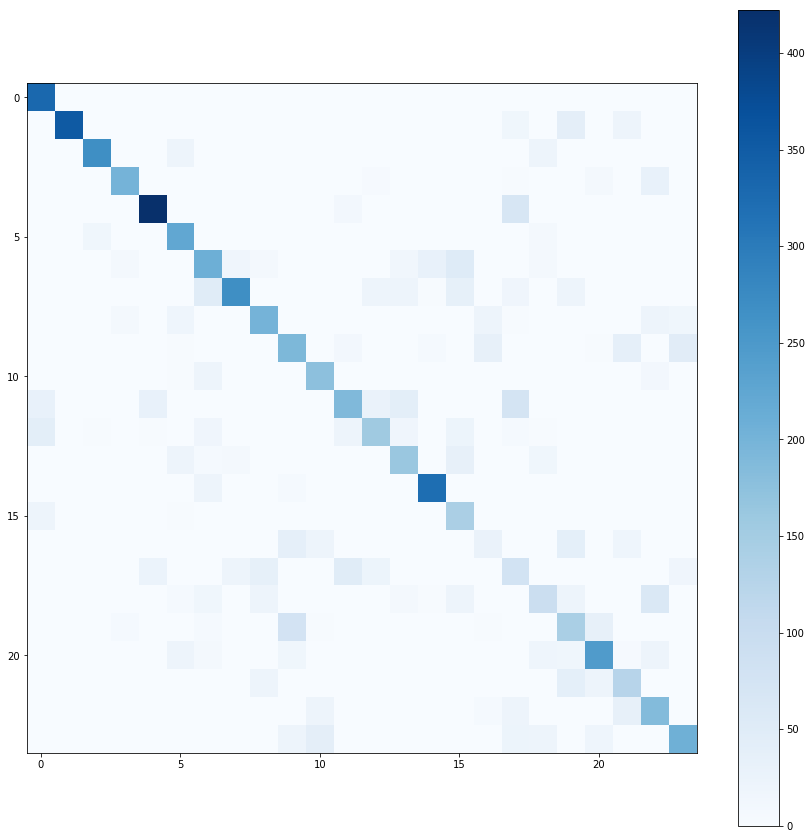

In [17]:

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y_t_predict = model.predict_classes(x_t.values)
cm = confusion_matrix(y_t, y_t_predict)
    
plt.figure(figsize=(15, 15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

**e)** Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de
validaci´on para seleccionar hiper-par´ametros, como el nivel de regularizaci´on aplicado y/o la funci´on
de kernel a utilizar.

**f)** Entrene una ´arbol de clasificaci´on sobre los pixeles con y sin pre-procesamiento. Puede utilizar el
conjunto de validaci´on para seleccionar hiper-par´ametros, como la profundidad m´axima del ´arbol.